In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fredapi as f
import os
import sys

In [53]:
sys.path.insert(0,'..') if '..' not in sys.path else _

In [55]:
import matplotlib as m
from datetime import datetime
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [56]:
from secret import akey

In [57]:
fred = f.Fred(api_key=akey)

In [74]:
# https://fred.stlouisfed.org/series/GOLDPMGBD228NLBM
# Gold Fixing Price 3:00 P.M. (London time) in London Bullion Market, based in U.S. Dollars
df = pd.DataFrame(fred.get_series('GOLDPMGBD228NLBM'),columns=['gold'])
df.to_csv(os.path.join('..','Data','gold' +'_'+ \
                       datetime.today().strftime('%Y%m%d')+'.csv'))
df = df.fillna(method='pad',limit=4)
# gold etf volatility index # CBOE Gold ETF Volatility Index
#getfvol = fred.get_series(series_id='GVZCLS')

In [75]:
df['ma_34'] = df.gold.rolling(window=34).mean()
df['ma_89'] = df.gold.rolling(window=89).mean()
df['priceGap34'] = 100. * (df.ma_34 - df.gold)/df.ma_34
df['priceGap89'] = 100. * (df.ma_89 - df.gold)/df.ma_89
df['madiff']     = (df.ma_89 - df.ma_34) * 100. / df.ma_89
df.dropna().describe()

,gold,ma_34,ma_89,priceGap34,priceGap89,madiff
count,13167.000000,13167.000000,13167.000000,13167.000000,13167.000000,13167.000000
mean,523.829929,522.277291,519.784401,-0.476852,-1.266955,-0.728168
std,431.008287,430.129469,428.899964,4.122894,7.042364,4.269925
min,34.750000,34.951176,35.060281,-55.000669,-87.864663,-31.007277
25%,277.950000,278.232353,278.229775,-2.241662,-3.973299,-2.444638
50%,379.750000,380.404412,380.341573,-0.055600,-0.320936,-0.160755
75%,633.925000,630.244853,612.932865,1.606253,2.483427,1.605898
max,1895.000000,1803.125000,1739.019663,24.387857,21.050460,14.177201


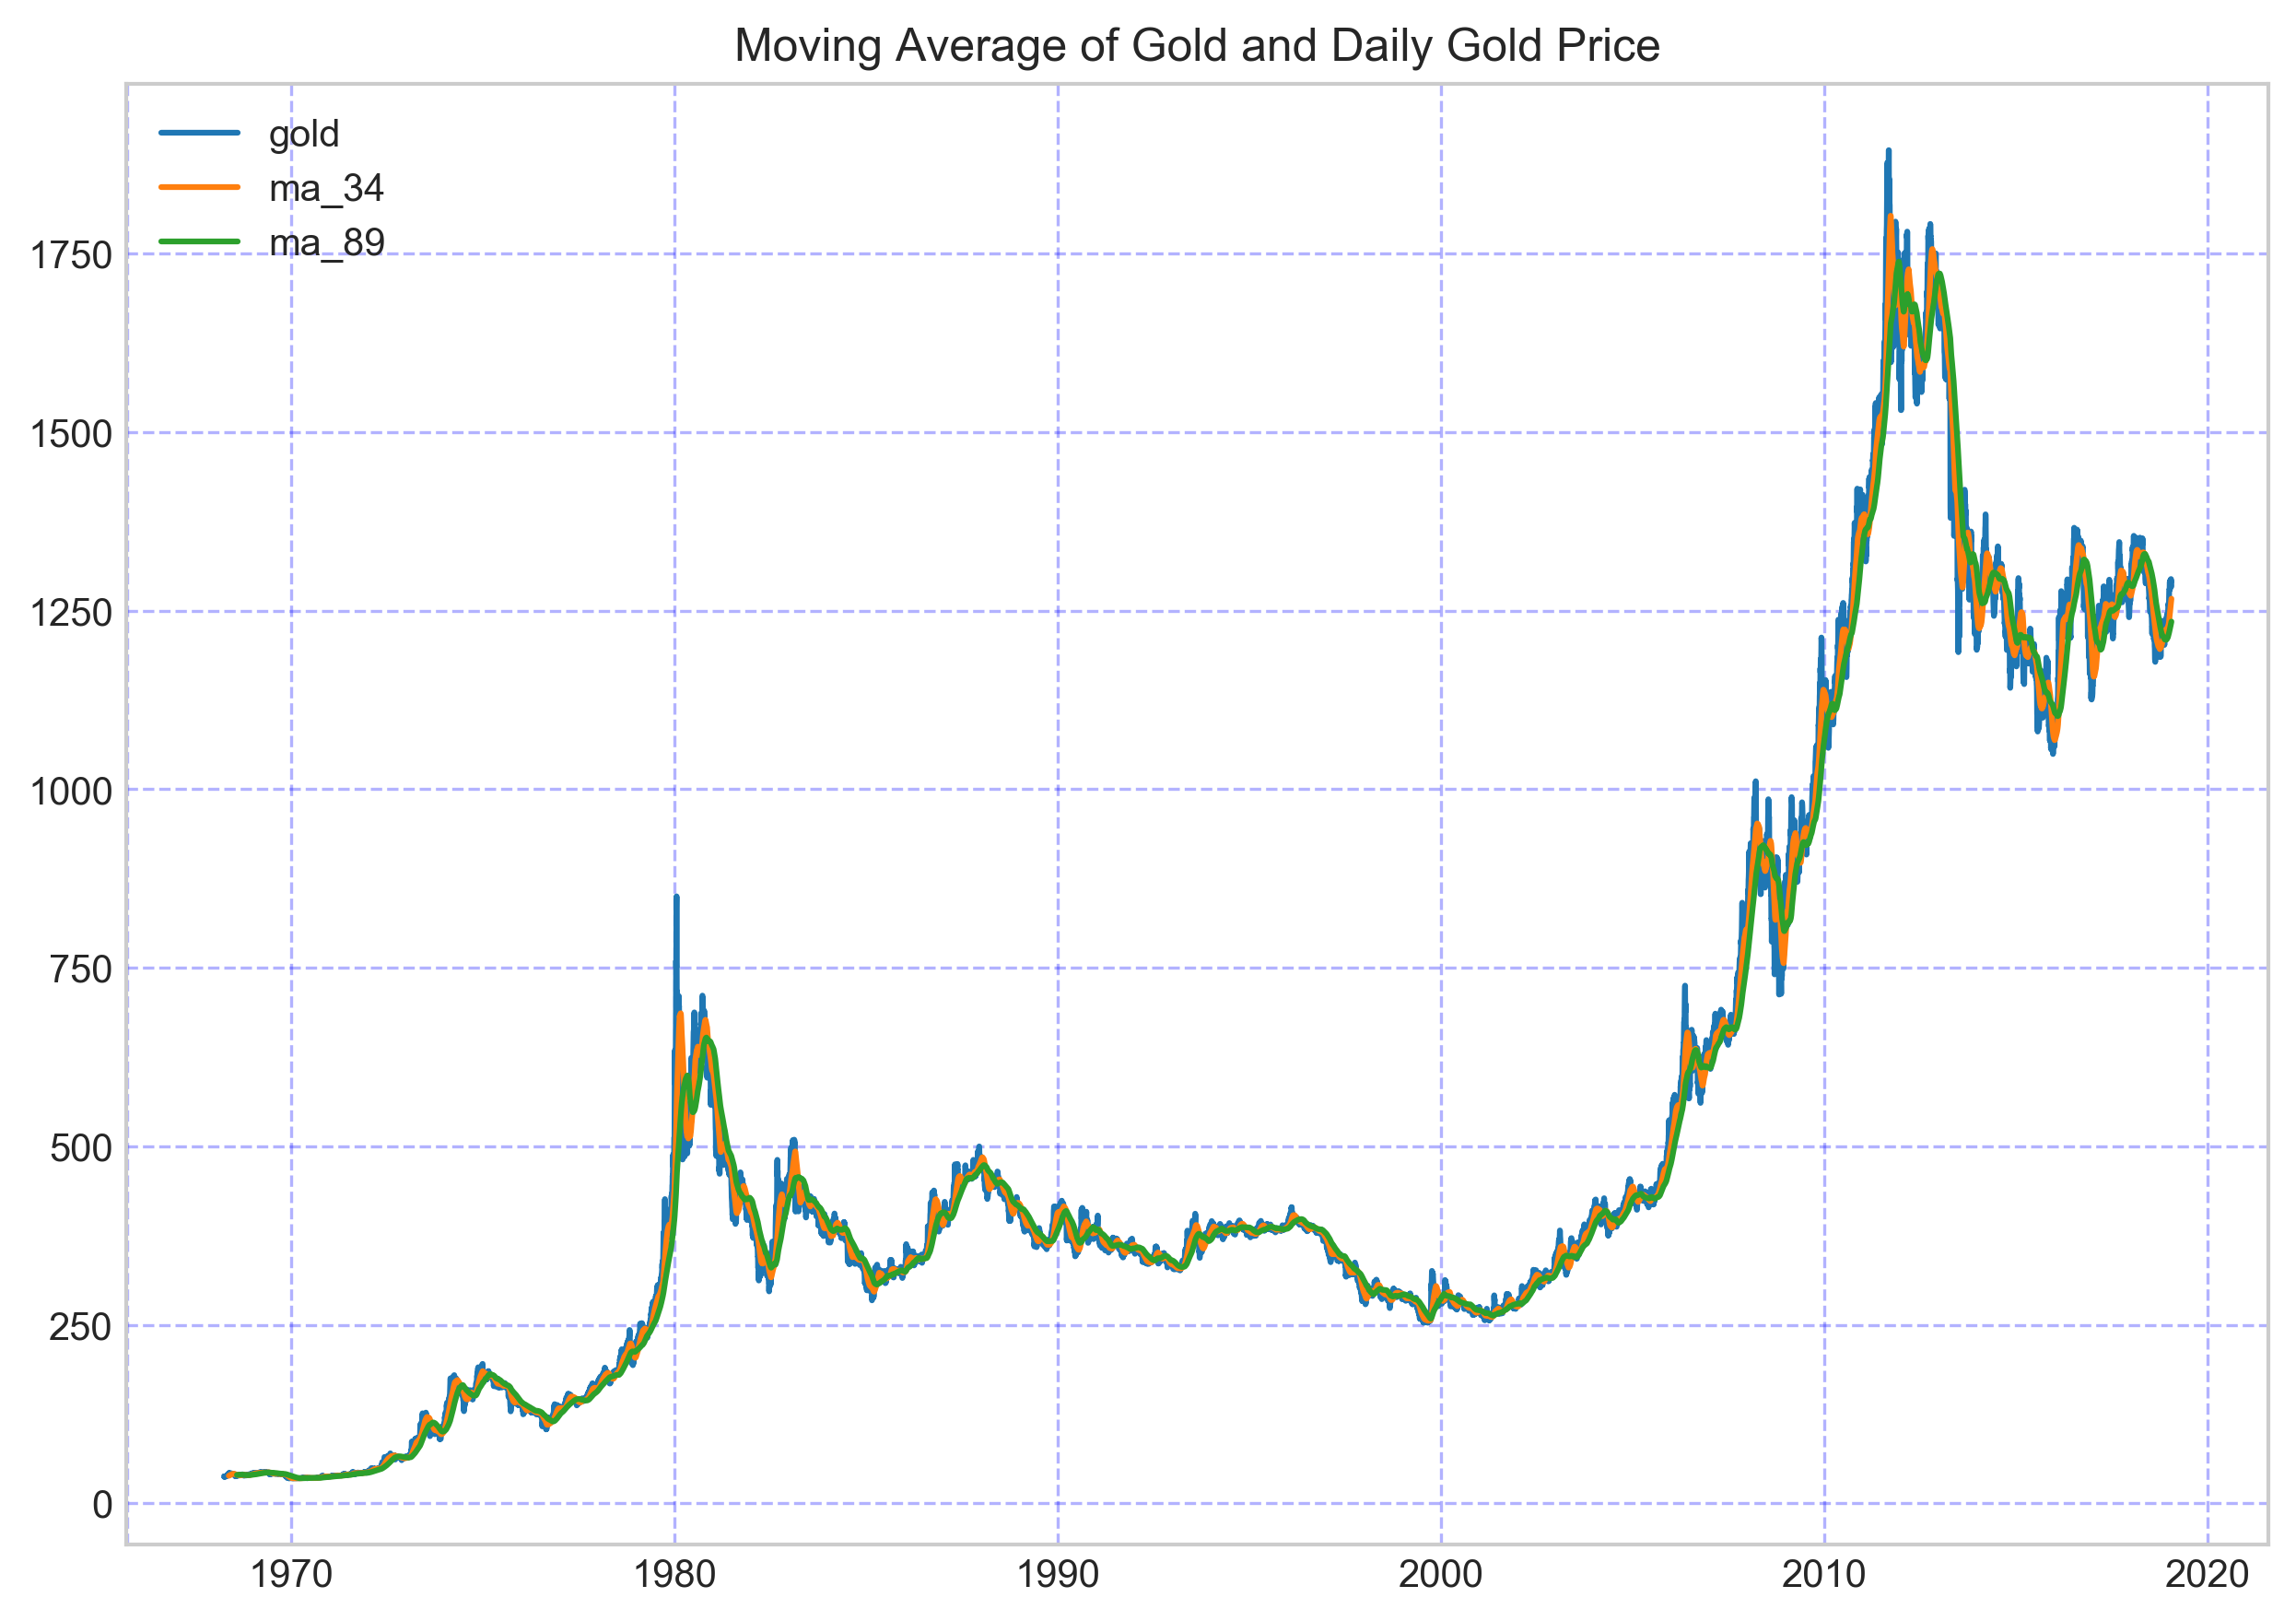

In [77]:
fig, ax1 = plt.subplots()
fig.set_dpi(300)
df[['gold','ma_34','ma_89']].plot(subplots=False,figsize=(10,7),ax=ax1)
ax1.set_title('Moving Average of Gold and Daily Gold Price', fontsize=12)
ax1.grid(linestyle='--',color='blue',alpha=0.3)
ax1.legend(loc='upper left')
plt.show()

### Same plot  yearwise

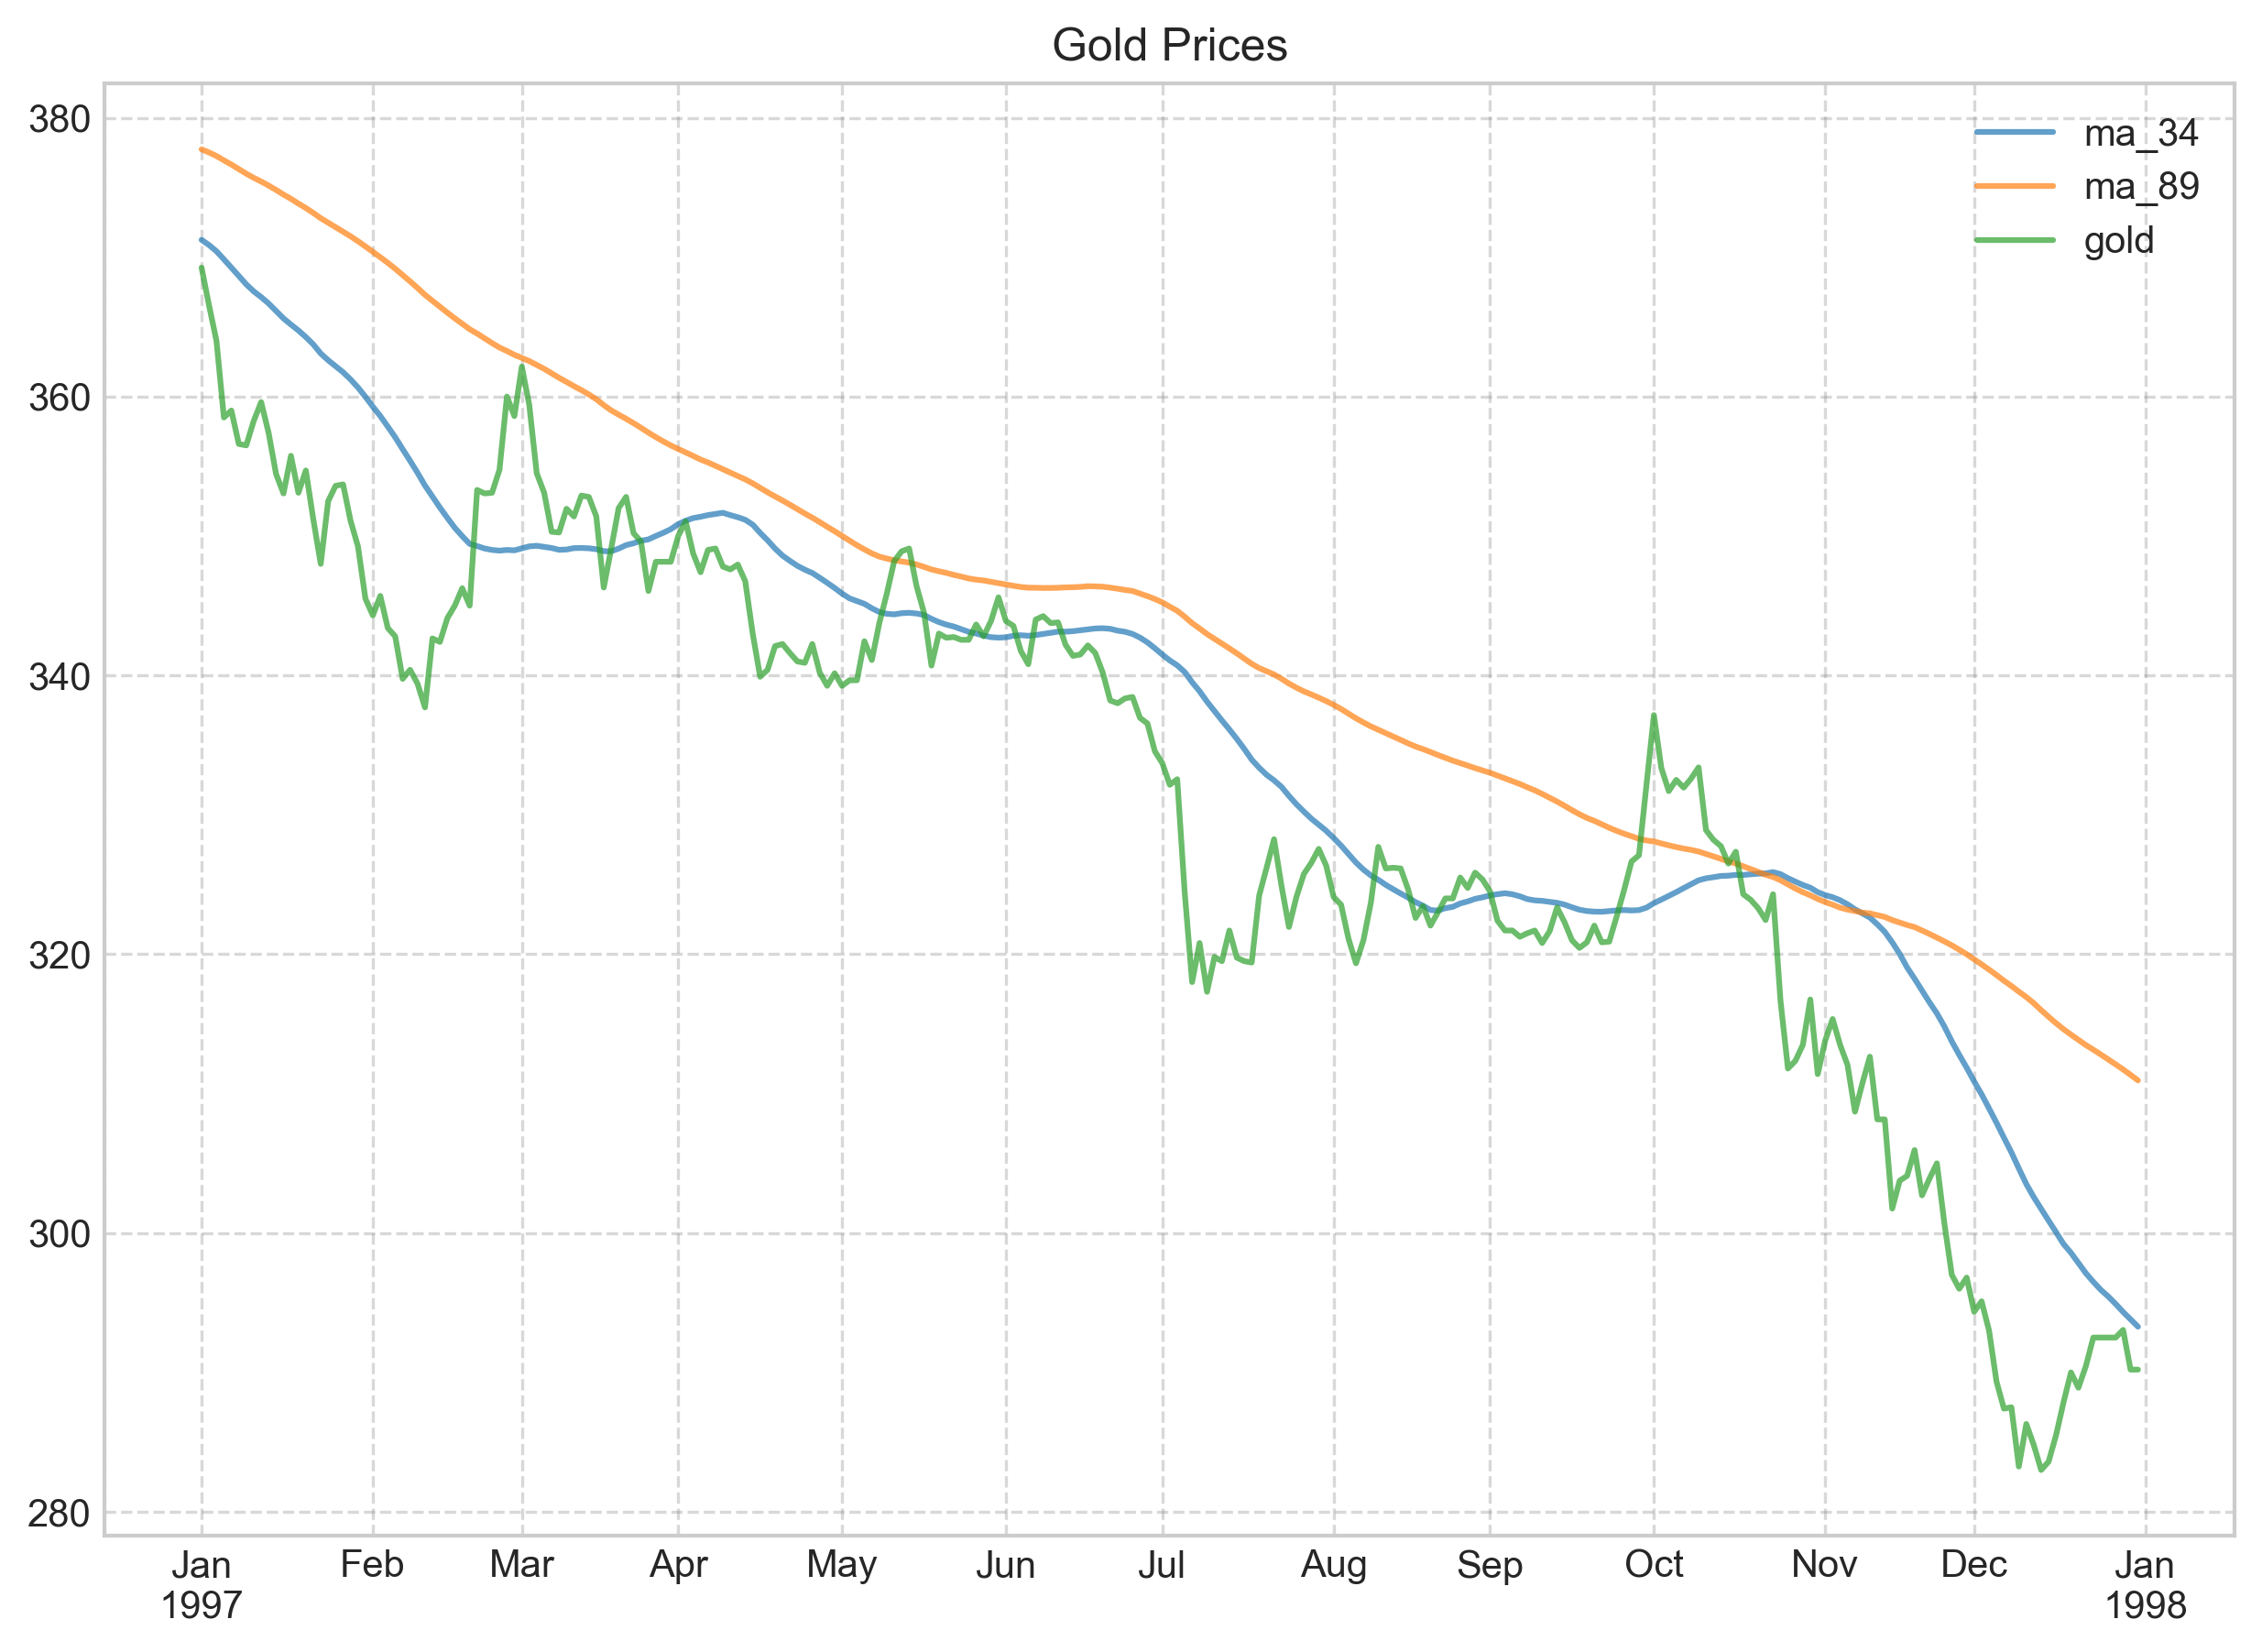

In [78]:
yr = 1997
fig, ax1 = plt.subplots()
fig.set_dpi(300)
df.loc[df.index.year == yr,['ma_34','ma_89','gold']]\
.plot(subplots=False,figsize=(10,7),ax=ax1,alpha=0.7)
ax1.set_title('Gold Prices', fontsize=12)
ax1.grid(linestyle='--',color='gray',alpha=0.3)
plt.show()
#md3.display(fig)

## Look at the differences

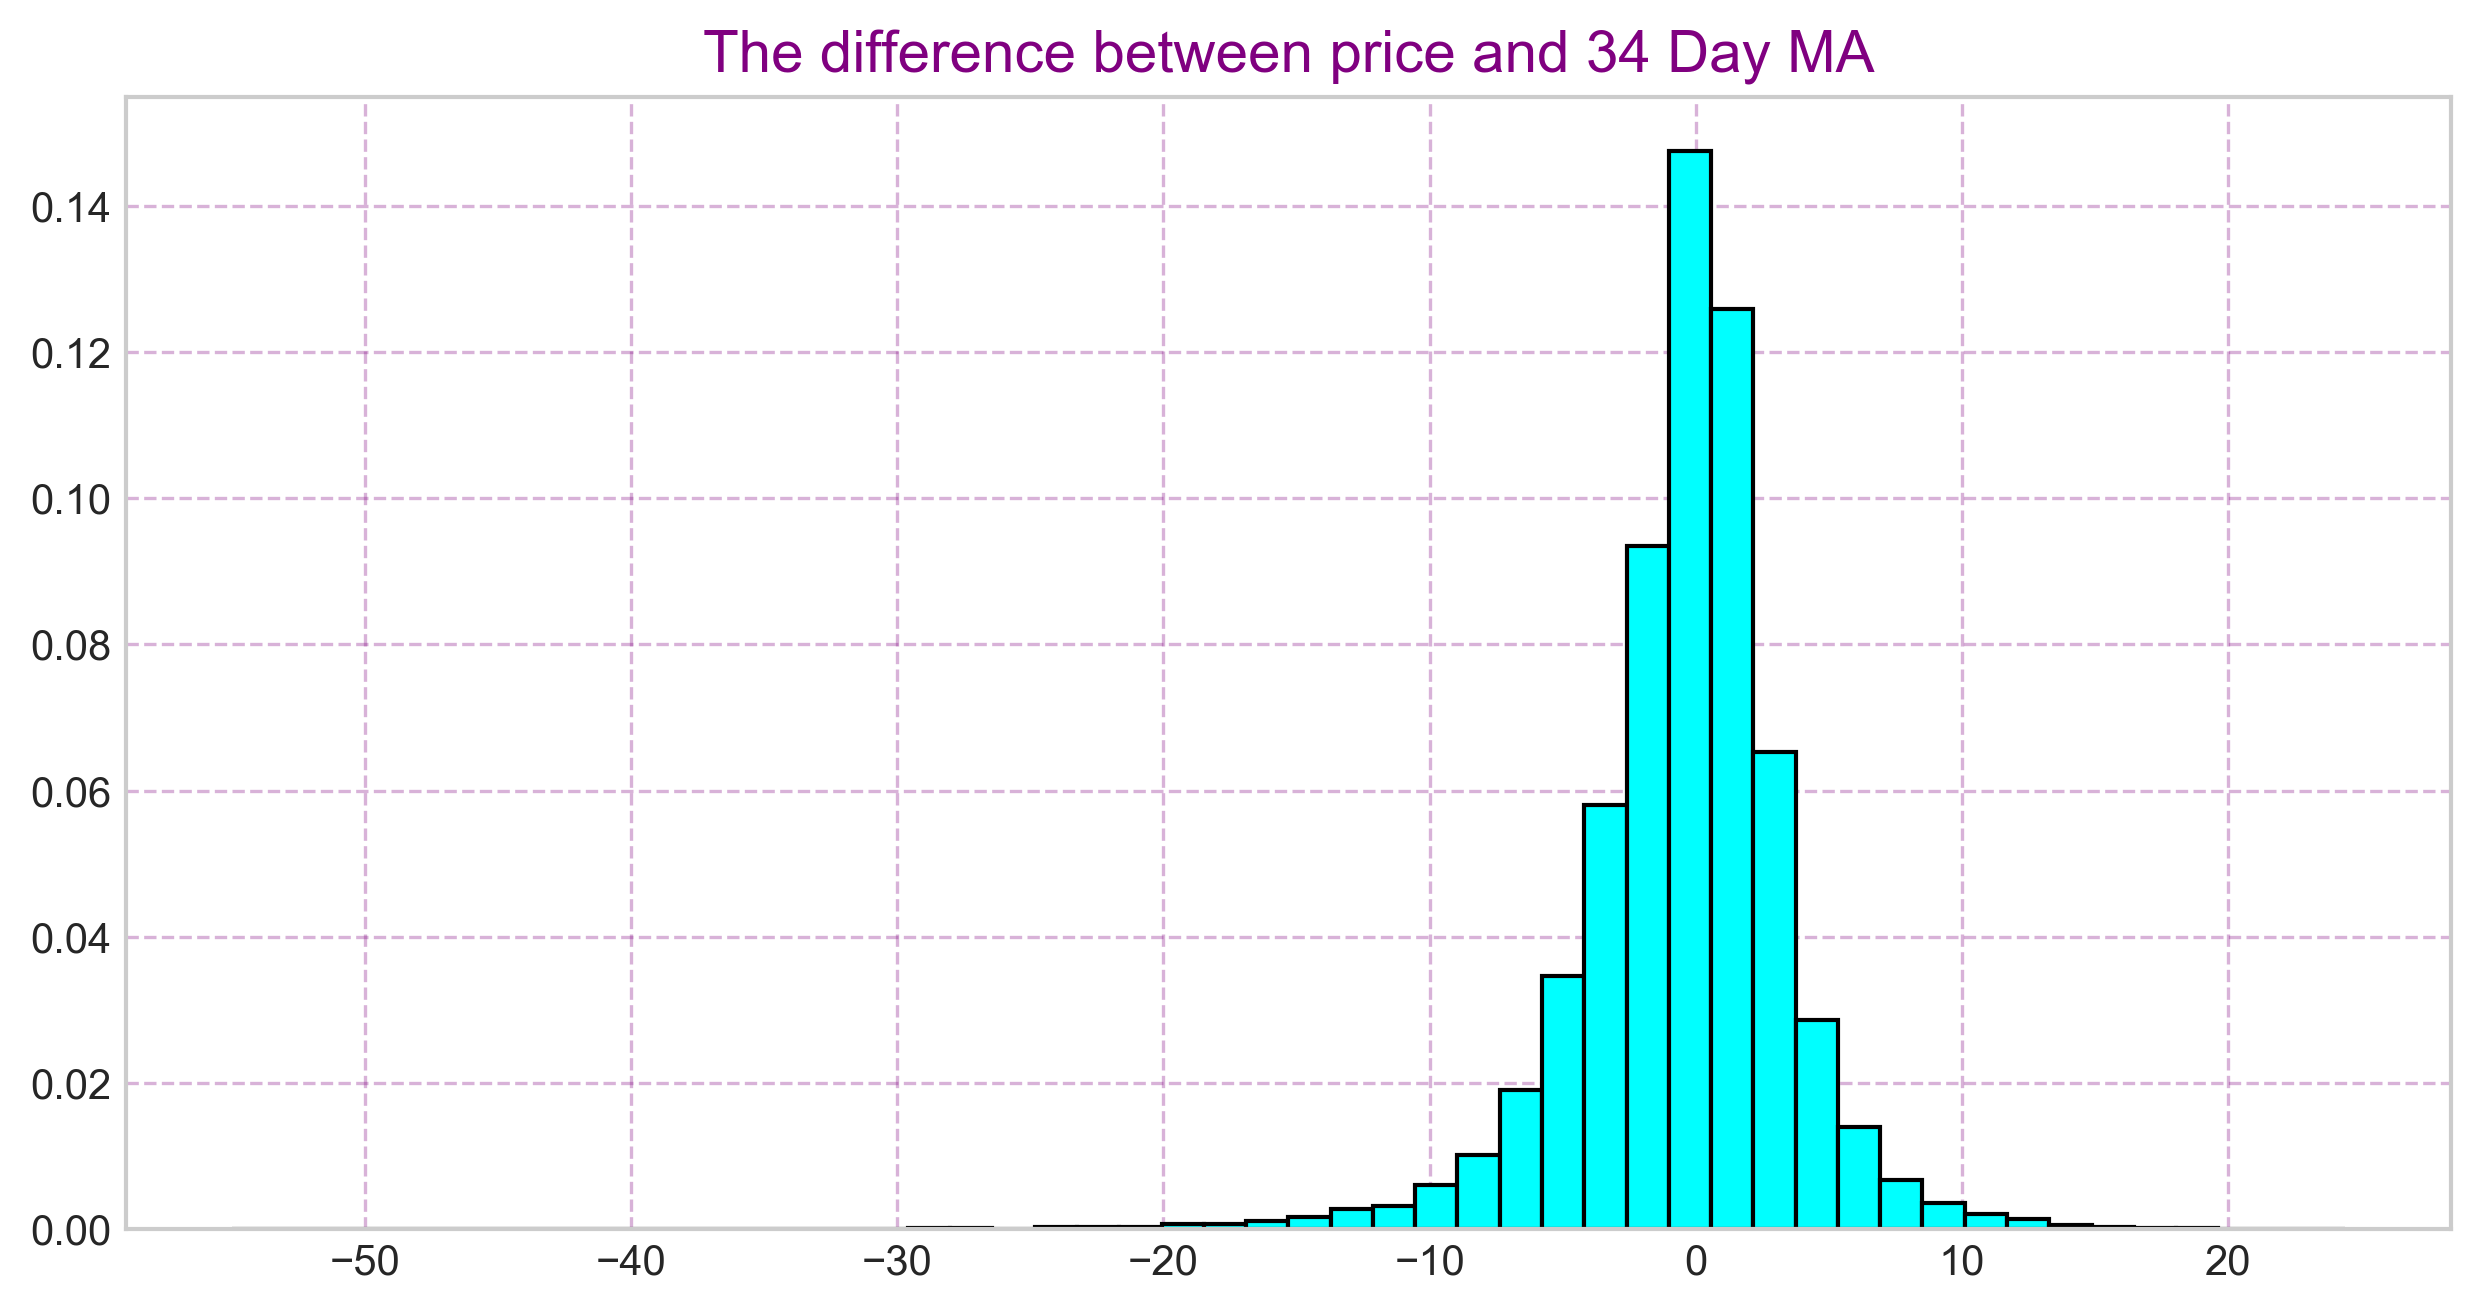

In [79]:
fig, ax = plt.subplots()
fig.set_dpi(300)
#fig.set_facecolor('green')
df.priceGap34.hist(figsize=(10,5),bins=50,fill=True, density = True,\
        color='cyan',edgecolor='black',ax=ax)
ax.set_title('The difference between price and 34 Day MA'\
             ,fontsize=14,color='purple')
ax.grid(linestyle='--',color='purple',alpha=0.3)
plt.show()

In [80]:
np.abs(df.priceGap34).describe()

count    13222.000000
mean         2.775262
std          3.085602
min          0.000000
25%          0.820486
50%          1.880133
75%          3.659362
max         55.000669
Name: priceGap34, dtype: float64